In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from TestFunctions import Rastrigin, Ackley, Sphere, Easom, Eggholder, Stybliski_Tang
from BOmethods import RandomSearch, Gaussian, WOA, PSO

%matplotlib inline

In [2]:
def test_function_visualize(test_function_obj):
    #for figure
    fig = plt.figure(figsize = (8, 8))
    
    #3DAxes
    ax = fig.add_subplot(111, projection='3d')
    
    x, y, z = test_function_obj.plot()
    surf = ax.plot_surface(x, y, z, cmap="bwr", linewidth=0)
    fig.colorbar(surf)
    plt.show()

Rastrigin function
search space:  [-5.12 <= x_i <=5.12]
optimal: f(0,...,0) = 0


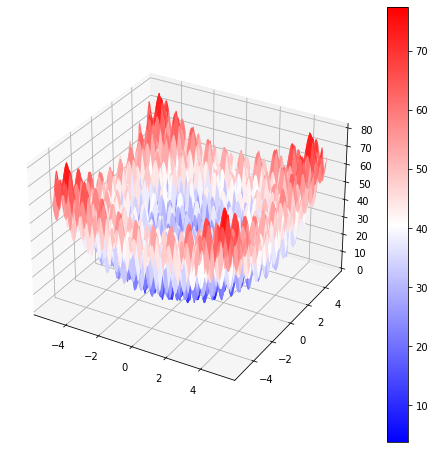

In [3]:
#visualize test function class
test_obj = Rastrigin()
test_function_visualize(test_obj)

Ackley function
search space: -5 <= x, y <= 5
optimal: f(0,0) = 0


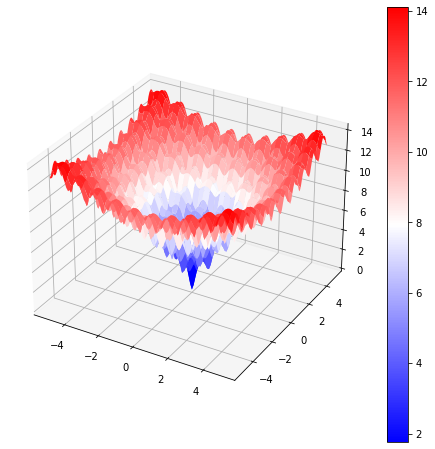

In [4]:
#visualize test function class
test_obj = Ackley()
test_function_visualize(test_obj)

Sphere function
Search space: -10 <= x_i <= 10
optimal: f(0,...,0) = 0


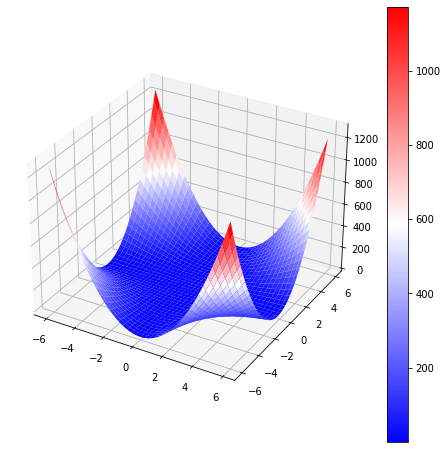

In [5]:
#visualize test function class
test_obj = Sphere()
test_function_visualize(test_obj)

Easom function
search space: -100 <= x, y <= 100
optimal: f(pi, pi) = -1


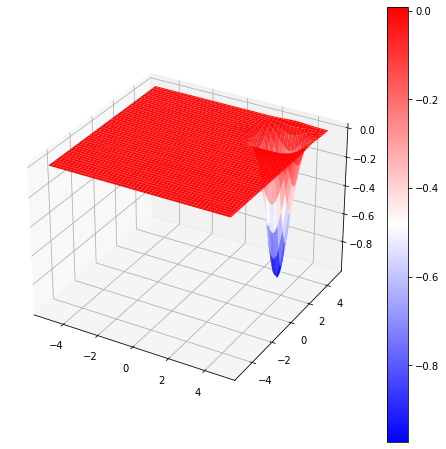

In [6]:
#visualize test function class
test_obj = Easom()
test_function_visualize(test_obj)

Eggholder function
search space: -512 <= x, y <= 512
optimal: f(512, 404.2319) = -959.6407


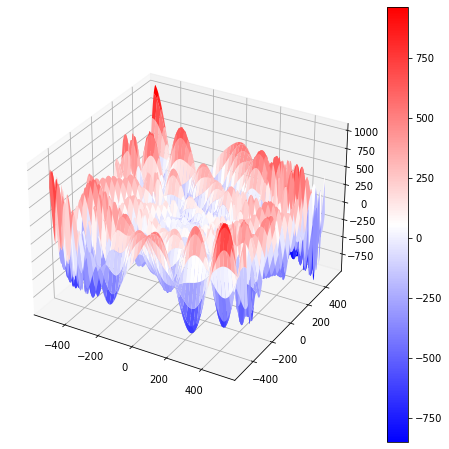

In [7]:
#visualize test function class
test_obj = Eggholder()
test_function_visualize(test_obj)

Stybliski-Tang function
Search space: -5 <= x_i <= 5
optimal: -39. 16617n < f(-2.903534, ..., -2.903534) < -39.16616n


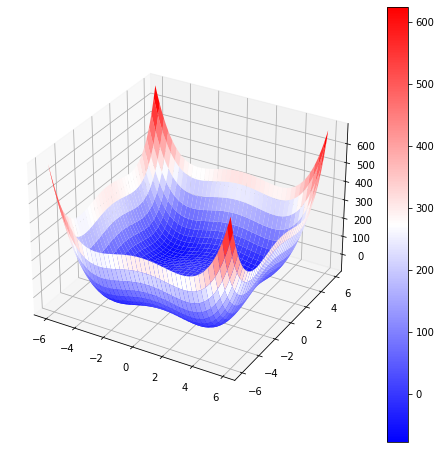

In [8]:
#visualize test function class
test_obj = Stybliski_Tang()
test_function_visualize(test_obj)

In [9]:
def show_plot(title, iteration, val):
    plt.grid()
    plt.xlabel("iteration")
    plt.ylabel("value")
    plt.title(title)
    plt.plot([i+1 for i in range(iteration)], val)

Rastrigin function
search space:  [-5.12 <= x_i <=5.12]
optimal: f(0,...,0) = 0
Random Search


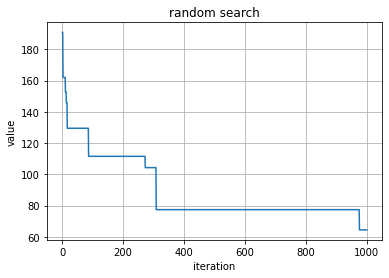

In [10]:
test_obj =   Rastrigin(ndim=10)
optimizer = RandomSearch(test_obj, ndim=10, ranges = [[-5.12,5.12] for n in range(10)])
val, variable = optimizer.fit(iteration=1000)
show_plot("random search", 1000, val)

Rastrigin function
search space:  [-5.12 <= x_i <=5.12]
optimal: f(0,...,0) = 0
gaussian


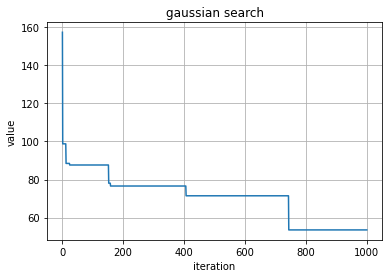

In [11]:
test_obj =   Rastrigin(ndim=10)
optimizer = Gaussian(test_obj, ndim=10, ranges = [[-5.12,5.12] for n in range(10)])
val, variable = optimizer.fit(iteration=1000, n_sample=10) #in case of gauusian search, needs sampling num per iteration
show_plot("gaussian search", 1000, val)

Rastrigin function
search space:  [-5.12 <= x_i <=5.12]
optimal: f(0,...,0) = 0
Whale optimization


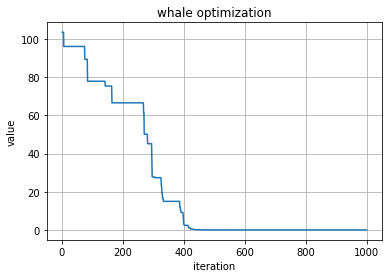

In [12]:
test_obj =  Rastrigin(ndim=10)
optimizer = WOA(test_obj, ndim=10, ranges = [[-5.12,5.12] for n in range(10)])
val, variable = optimizer.fit(iteration=1000, population=10)
show_plot("whale optimization",1000, val)

Rastrigin function
search space:  [-5.12 <= x_i <=5.12]
optimal: f(0,...,0) = 0
Particle Swam optimization


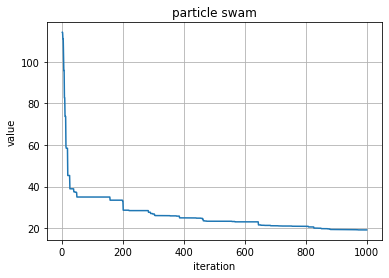

In [13]:
test_obj =  Rastrigin(ndim=10)
optimizer = PSO(test_obj, ndim=10,  ranges = [[-5.12,5.12] for n in range(10)])
val, variable = optimizer.fit(iteration=1000, population=10, c1=0.5, c2=0.5)
show_plot("particle swam",1000, val)